In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import anderson
import statsmodels.api as sm
import streamlit as st
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
import pickle
import shap
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from geopy.geocoders import Nominatim
from sklearn.decomposition import PCA

In [6]:
import sys
sys.path.append("../../ML_MADRID_HOUSING/")
from src.functions_housing import valoracion_modelos

GeocoderInsufficientPrivileges: Non-successful status code 403

## 1. Carga de datos

In [ ]:
df_mad = pd.read_csv("../Data/Processed/madrid.csv")

In [ ]:
df_mad= df_mad[['Latitud','Precio_Medio_cp','Superficie_m2','Habitaciones','Baños', 'Ascensor',
       'Parking','Balcon','Aire_Acondicionado', 'Calefaccion','Piscina','Terraza','Precio']]

In [ ]:
df_mad.describe()

,Latitud,Precio_Medio_cp,Superficie_m2,Habitaciones,Baños,Ascensor,Parking,Balcon,Aire_Acondicionado,Calefaccion,Piscina,Terraza,Precio
count,9666.000000,9.666000e+03,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9.666000e+03
mean,40.422016,5.382725e+05,110.929030,2.665115,1.807987,0.695117,0.098800,0.174115,0.555969,0.724395,0.092179,0.366543,5.296802e+05
std,0.033236,3.413219e+05,85.219614,1.183477,1.020819,0.460382,0.298409,0.379228,0.496883,0.446842,0.289293,0.481885,5.296453e+05
min,40.331640,1.527170e+05,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.370000e+04
25%,40.398871,2.472710e+05,66.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.050000e+05
50%,40.422475,4.407960e+05,91.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.550000e+05
75%,40.442376,7.475770e+05,127.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.790000e+05
max,40.531520,1.709528e+06,2000.000000,13.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+06


Creamos X e Y

In [ ]:
X = df_mad.drop(columns=["Precio"], axis=1)
y = df_mad["Precio"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7732, 12)
(1934, 12)
(7732,)
(1934,)


In [ ]:
# Escalamos los datos del train con StandardScaler()
scal = StandardScaler() # Declaramos el modelo
scal.fit(X_train) # Entrenamos el modelo
X_train_scal = scal.transform(X_train) # Aplicamos el scaler en los datos de Train 
X_test_scal = scal.transform(X_test) # Aplicamos el scaler en los datos del test

#Reverse
#X_train = scal.inverse_transform(X_train)

In [ ]:
rf_i = RandomForestRegressor()
rf_i.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
importancias = rf_i.feature_importances_
nombres_caracteristicas=rf_i.feature_names_in_
indices_ordenados = np.argsort(importancias)[::-1]
indices_ordenados = np.argsort(importancias)[::-1]
for i in indices_ordenados:
    print(f"{nombres_caracteristicas[i]}: {importancias[i]}")

Superficie_m2: 0.5916588686718625
Precio_Medio_cp: 0.20609492687411318
Baños: 0.08022153952184376
Latitud: 0.07616853129633225
Habitaciones: 0.01425842870271497
Aire_Acondicionado: 0.0077779366977998934
Ascensor: 0.0056209119398360164
Terraza: 0.004456558918605722
Calefaccion: 0.004176197710299981
Balcon: 0.004143412860624363
Parking: 0.002801488422103083
Piscina: 0.002621198383864391


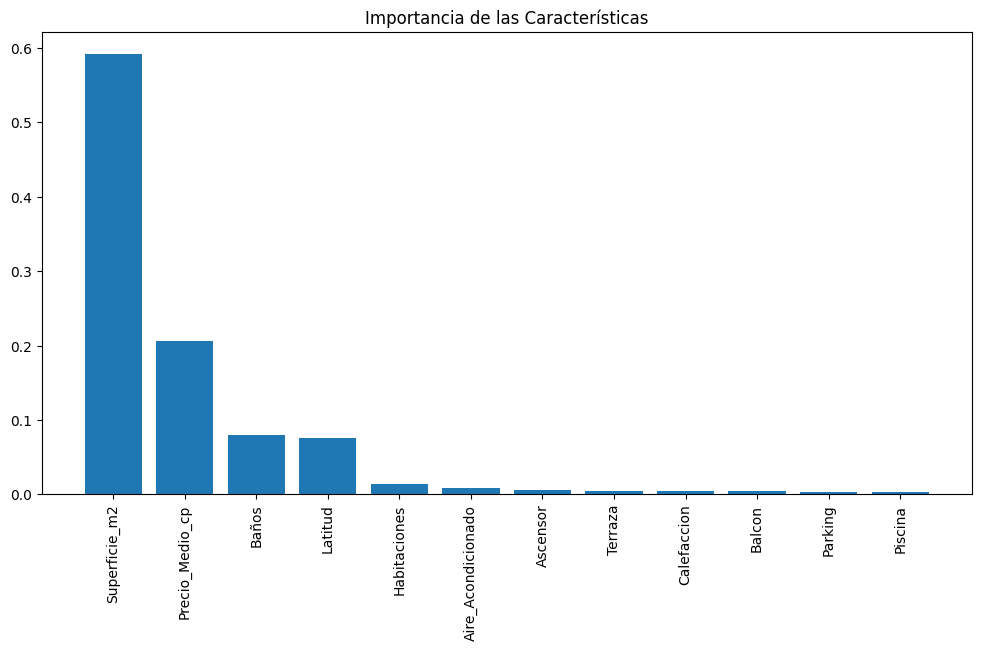

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(len(importancias)), importancias[indices_ordenados], align="center")
plt.xticks(range(len(importancias)), np.array(nombres_caracteristicas)[indices_ordenados], rotation=90)
plt.xlim([-1, len(importancias)])
plt.show()

## Regresión Lineal

In [ ]:
# Entrenamos los datos escalados
linear_model_scal = LinearRegression()
linear_model_scal.fit(X_train_scal, y_train)

LinearRegression()

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Ridge

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [ ]:
ridge_model_scal = Ridge()
ridge_model_scal.fit(X_train_scal,y_train)

Ridge()

### Lasso

In [ ]:
Lasso_model = Lasso()
Lasso_model.fit(X_train,y_train)

Lasso()

In [ ]:
Lasso_model_scal = Lasso()
Lasso_model_scal.fit(X_train_scal,y_train)

Lasso()

### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_scal = RandomForestRegressor()
rf_scal.fit(X_train_scal,y_train)

RandomForestRegressor()

In [ ]:

modelo = RandomForestRegressor()

parameters = {"n_estimators":[10,100,200],
              "max_depth":[3,6,8],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2, 5, 7],
              "min_samples_leaf": [1, 2, 4],
              "max_features": [3,5,8]
}

rfr_gs = GridSearchCV(modelo,
                      parameters,
                      cv=5,
                      scoring="neg_mean_absolute_error",
                      n_jobs= -1)

In [ ]:
rfr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 6, 8], 'max_features': [3, 5, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 100, 200]},
             scoring='neg_mean_absolute_error')

In [ ]:
rfr_gs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

### GardientBoosting

In [ ]:
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train,y_train)

GradientBoostingRegressor()

### Pipeline

In [ ]:
# Definimos los pasos del Pipeline
steps = [ ('n_estimators',None),
    ('model', None)  # Modelo a evaluar (se especificará posteriormente)
]

# Crear el pipeline
pipeline = Pipeline(steps)

# Definir los hiperparámetros a ajustar para cada modelo
parameters = [
    {
        'model': [LinearRegression()]  # Regresión lineal
    },
    {
        'model': [RandomForestRegressor()],  # RandomForestRegressor
        'model__n_estimators': [10, 50, 100],  # Número de árboles en el bosque
        'model__max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    }
]

# Realizar la búsqueda de hiperparámetros y seleccionar el mejor modelo
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # X_train y y_train son tus datos de entrenamiento

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('n_estimators', None),
                                       ('model', None)]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [None, 5, 10],
                          'model__n_estimators': [10, 50, 100]}],
             scoring='neg_mean_squared_error')

In [ ]:
# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('n_estimators', None), ('model', RandomForestRegressor())])

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(9666, 12)

In [ ]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.25909463, 0.3866417 , 0.49178489, 0.58254628, 0.66315476,
       0.73218369, 0.8003593 , 0.86182782])

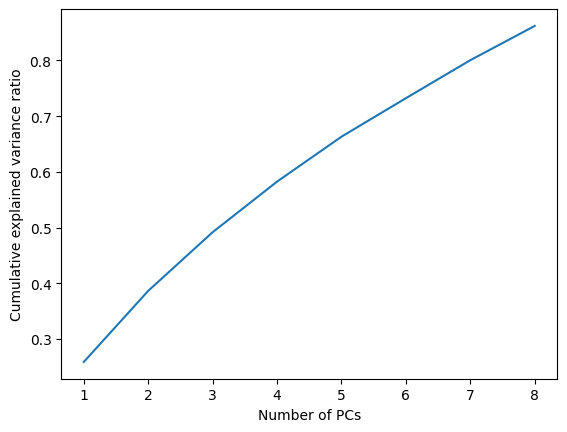

In [ ]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,9)))
plt.xlabel('Number of PCs')
plt.ylabel("Cumulative explained variance ratio");

In [ ]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestRegressor())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestRegressor())])

In [ ]:
params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7],
    'classifier__max_depth': np.arange(3,7),
    'classifier__min_samples_leaf': [2,3,4]
}

gs = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid={'classifier__max_depth': array([3, 4, 5, 6]),
                         'classifier__min_samples_leaf': [2, 3, 4],
                         'pca__n_components': [5, 6, 7],
                         'scaler': [StandardScaler(), None]},
             scoring='neg_mean_absolute_error')

In [ ]:
valoracion_modelos("pca_randomforest",gs, X_test, y_test )

R2_score pca_randomforest 0.8289001109197963
MAE pca_randomforest 119247.40733931813
MSE pca_randomforest 49781166913.4079
MAPE pca_randomforest 24.099900369874693


### Evaluacion modelos

In [ ]:
valoracion_modelos("linear_model",linear_model, X_test, y_test )

R2_score linear_model 0.7491558315821971
MAE linear_model 148695.3066479008
MSE linear_model 72982603813.42606
MAPE linear_model 33.1827086926275


In [ ]:
valoracion_modelos("linear_model_scal",linear_model_scal, X_test_scal, y_test )

R2_score linear_model_scal 0.7491558315821981
MAE linear_model_scal 148695.3066479018
MSE linear_model_scal 72982603813.42577
MAPE linear_model_scal 33.18270869262809


In [ ]:
valoracion_modelos("Ridge",ridge_model, X_test, y_test )

R2_score Ridge 0.7491438695384725
MAE Ridge 148299.7213160161
MSE Ridge 72986084145.87096
MAPE Ridge 33.01425708736371


In [ ]:
valoracion_modelos("Ridge_scal",ridge_model_scal, X_test_scal, y_test )

R2_score Ridge_scal 0.749168561867682
MAE Ridge_scal 148688.03820549193
MSE Ridge_scal 72978899962.59377
MAPE Ridge_scal 33.17895305886986


In [ ]:
valoracion_modelos("Lasso",Lasso_model, X_test, y_test )

R2_score Lasso 0.7491570829491363
MAE Lasso 148690.47391514675
MSE Lasso 72982239730.74428
MAPE Lasso 33.1805921772023


In [ ]:
valoracion_modelos("Lasso_scal",Lasso_model_scal, X_test_scal, y_test )

R2_score Lasso_scal 0.7491565911383775
MAE Lasso_scal 148694.39278844238
MSE Lasso_scal 72982382822.09055
MAPE Lasso_scal 33.18223691155038


In [ ]:
valoracion_modelos('RandomForest',rf,X_test,y_test)

R2_score RandomForest 0.8889829764806578
MAE RandomForest 82950.46121879155
MSE RandomForest 32300178613.532063
MAPE RandomForest 15.418986342670408


In [ ]:
valoracion_modelos('RandomForest_Scal',rf_scal,X_test_scal,y_test)

R2_score RandomForest_Scal 0.8901503982965749
MAE RandomForest_Scal 82629.85622903434
MSE RandomForest_Scal 31960519595.697872
MAPE RandomForest_Scal 15.306640146487819


In [ ]:
valoracion_modelos('RandomForest_GS',rfr_gs,X_test,y_test)

R2_score RandomForest_GS 0.8619425516248032
MAE RandomForest_GS 95200.3829524302
MSE RandomForest_GS 40167535573.23046
MAPE RandomForest_GS 17.610780920026865


In [ ]:
valoracion_modelos("GB",GB_model, X_test, y_test )

R2_score GB 0.8716349831764698
MAE GB 101741.44605586269
MSE GB 37347542202.900894
MAPE GB 19.893806096694053


In [ ]:
# valoracion_modelos('RandomForest',rfr_gs,X_test,y_test)

In [ ]:
valoracion_modelos("pipeline",best_model,X_test,y_test)

R2_score pipeline 0.8913490404585944
MAE pipeline 81848.04141104053
MSE pipeline 31611777081.265434
MAPE pipeline 15.2581017171773


### Exportación de modelos

In [ ]:
# Exportamos el RandomForestRegresor del GridSerchCV
with open('../models/rf_scal.pkl', 'wb') as salida:
    pickle.dump(rf_scal,salida)

In [ ]:
# Exportamos el RandomForestRegresor del Pipeline
with open('../models/Rf.pkl', 'wb') as salida:
    pickle.dump(rf,salida)